In [13]:
import geopandas as gpd
import pandas as pd
import sys
sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv

In [14]:
# set the filepath and load in a shape
fp = "../datasets/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

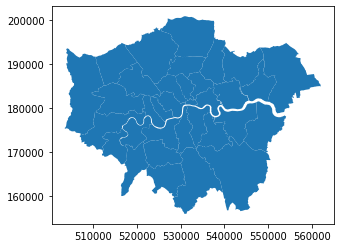

In [15]:
map_df.plot()

In [16]:
#df = pd.read_csv('datasets/london-borough-profile.csv', header=0)
#df = pd.read_csv(vv.LISTING_COMBINED_FILE,encoding="utf-8")
df = vv.quick_data(remove_duplicates=True,numeric_values_only=False,HOW='listings_only',publish=True)
df.head(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:262: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 26770/36433/30563/30870 ==> 26770/26958/26755/26762
dataframe length: 26770


,Description,Price,add_info,borough_name
ids,,,,
124631054,1 bedroom maisonette for sale,450000.0,"Added on 04/07/2022 by Foxtons, Battersea",Wandsworth
124170653,1 bedroom apartment for sale,510000.0,"Added on 13/05/2022 by Life Residential, Nine ...",Wandsworth
113323340,3 bedroom apartment for sale,511875.0,"Reduced on 26/12/2021 by Barnard Marcus, Earls...",Wandsworth
119857787,3 bedroom flat for sale,512500.0,Reduced on 08/03/2022 by Jacksons Estate Agent...,Wandsworth
119114129,1 bedroom apartment for sale,NaN,"Reduced on 19/11/2021 by Rochford Stokes, Batt...",Wandsworth
120260813,2 bedroom apartment for sale,515000.0,"Added on 21/02/2022 by Martin & Co, London Riv...",Wandsworth
123281321,2 bedroom apartment for sale,515000.0,"Added on 12/05/2022 by Purplebricks, covering ...",Wandsworth
123445862,1 bedroom apartment for sale,515000.0,"Added on 18/05/2022 by Garton Jones, London",Wandsworth
121535105,2 bedroom apartment for sale,515000.0,Reduced on 25/04/2022 by Andrews Estate Agents...,Wandsworth


In [17]:
df['Price'] = pd.to_numeric(df['Price'], 'coerce').dropna().astype(int)
df = df[df["Price"] <= 600000]
print(df.shape)
df.head()

(25028, 4)


,Description,Price,add_info,borough_name
ids,,,,
124631054,1 bedroom maisonette for sale,450000.0,"Added on 04/07/2022 by Foxtons, Battersea",Wandsworth
124170653,1 bedroom apartment for sale,510000.0,"Added on 13/05/2022 by Life Residential, Nine ...",Wandsworth
113323340,3 bedroom apartment for sale,511875.0,"Reduced on 26/12/2021 by Barnard Marcus, Earls...",Wandsworth
119857787,3 bedroom flat for sale,512500.0,Reduced on 08/03/2022 by Jacksons Estate Agent...,Wandsworth
120260813,2 bedroom apartment for sale,515000.0,"Added on 21/02/2022 by Martin & Co, London Riv...",Wandsworth


In [18]:
df.columns

Index(['Description', 'Price', 'add_info', 'borough_name'], dtype='object')

In [19]:
# those are really terrible column names. let's rename them to something simpler
score = df.rename(index=str, columns={"Station_Prox": "closeness_to_station",'bedrooms_model':'bedrooms','bathrooms_model':'bathrooms','tenure.tenureType':'tenureType'}
                                      )
score.head()

,Description,Price,add_info,borough_name
ids,,,,
124631054,1 bedroom maisonette for sale,450000.0,"Added on 04/07/2022 by Foxtons, Battersea",Wandsworth
124170653,1 bedroom apartment for sale,510000.0,"Added on 13/05/2022 by Life Residential, Nine ...",Wandsworth
113323340,3 bedroom apartment for sale,511875.0,"Reduced on 26/12/2021 by Barnard Marcus, Earls...",Wandsworth
119857787,3 bedroom flat for sale,512500.0,Reduced on 08/03/2022 by Jacksons Estate Agent...,Wandsworth
120260813,2 bedroom apartment for sale,515000.0,"Added on 21/02/2022 by Martin & Co, London Riv...",Wandsworth


In [20]:
score['Price'] = pd.to_numeric(score['Price'], 'coerce').fillna(-1).astype(int)

borough_property = score.groupby(['borough_name']).agg(mean_price=('Price',"mean"), median_price=('Price',"median"), total_properties=('Price','count'))
#borough_property = borough_property.reset_index()
borough_property

,mean_price,median_price,total_properties
borough_name,,,
Barking and Dagenham,316307.153199,312500.0,594
Barnet,365998.071249,350000.0,1193
Brent,596104.125000,600000.0,120
Bromley,327506.220736,325000.0,897
Camden,401529.713115,450000.0,244
City of London,430924.590164,499950.0,61
Croydon,251308.762332,225000.0,446
Ealing,418888.276328,430000.0,2222
Enfield,388060.317511,390000.0,1559


In [21]:
# join the geodataframe with the cleaned up csv dataframe
#merged = map_df.set_index('NAME').join(borough_property.set_index('borough_name'))
merged = map_df.set_index('NAME').join(borough_property)

print(merged.shape)
merged

(33, 10)


,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,mean_price,median_price,total_properties
NAME,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",325126.053743,325000.0,521.0
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",251308.762332,225000.0,446.0
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",327506.220736,325000.0,897.0
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",371753.250916,375000.0,1092.0
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",418888.276328,430000.0,2222.0
Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",367500.163685,375000.0,1509.0
Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",357986.601701,325000.0,1293.0
Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",422311.926483,425000.0,1197.0
Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",596104.125000,600000.0,120.0


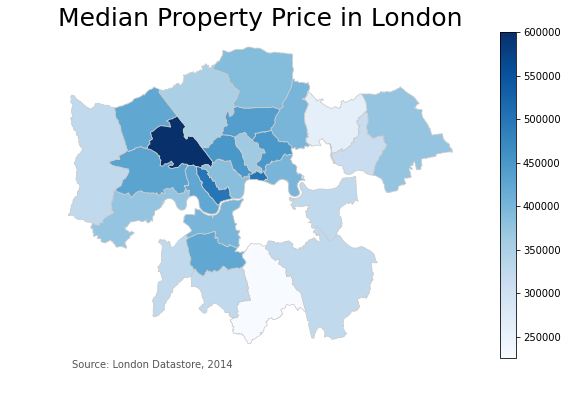

In [22]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'median_price'

# set the range for the choropleth
#vmin, vmax = 120, 220
vmin, vmax = merged[variable].min(), merged[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Median Property Price in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap_median_price.png', dpi=300)

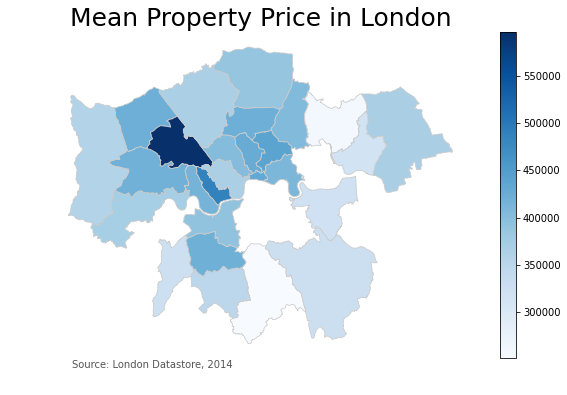

In [23]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'mean_price'

# set the range for the choropleth
#vmin, vmax = 120, 220
vmin, vmax = merged[variable].min(), merged[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Mean Property Price in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap_mean_price.png', dpi=300)

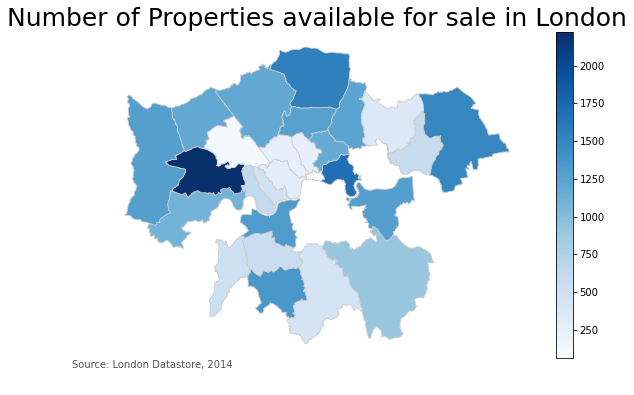

In [24]:
from matplotlib import pyplot as plt

# set a variable that will call whatever column we want to visualise on the map
variable = 'total_properties'

# set the range for the choropleth
#vmin, vmax = 120, 220
vmin, vmax = merged[variable].min(), merged[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Number of Properties available for sale in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap_total_properties.png', dpi=300)

